# Composition Analyses Suite

In [3]:
import os
import numpy as np
import pandas as pd
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


We will be using SSCx dissemination circuits. We set up paths and load the 
biological mean circuit (over 7 rats).

In [4]:
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()

In [5]:
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit, MockBlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

mock_circuit_model =\
    MockBlueBrainCircuitModel(
        circuit_composition, 
        circuit_connectivity,
        label="BlueBrainCircuitModelMockLight")

In [6]:
suite_composition_analyses =\
    CompositionAnalysesSuite(
        sample_size=100,
        size_roi=50.*np.ones(1))

In [7]:
suite_composition_analyses\
    .measurement_cell_density_using_sampling(
        mock_circuit_model,
        adapter,
        depth=None)

96000.0

In [8]:
cell_density_measurement =\
    suite_composition_analyses\
        .analysis_cell_density_by_depth_using_sampling\
        .get_measurement(
            mock_circuit_model,
            adapter,
            sample_size=1)
print(cell_density_measurement["data"].shape)
cell_density_measurement["data"].head()

(104, 1)


cell_density
dataset                        region (depth, begin) (depth, end)              
BlueBrainCircuitModelMockLight S1HL   0.0            100.0              24000.0
                                      100.0          200.0             568000.0
                                      200.0          300.0              96000.0
                                      300.0          400.0             344000.0
                                      400.0          500.0             368000.0

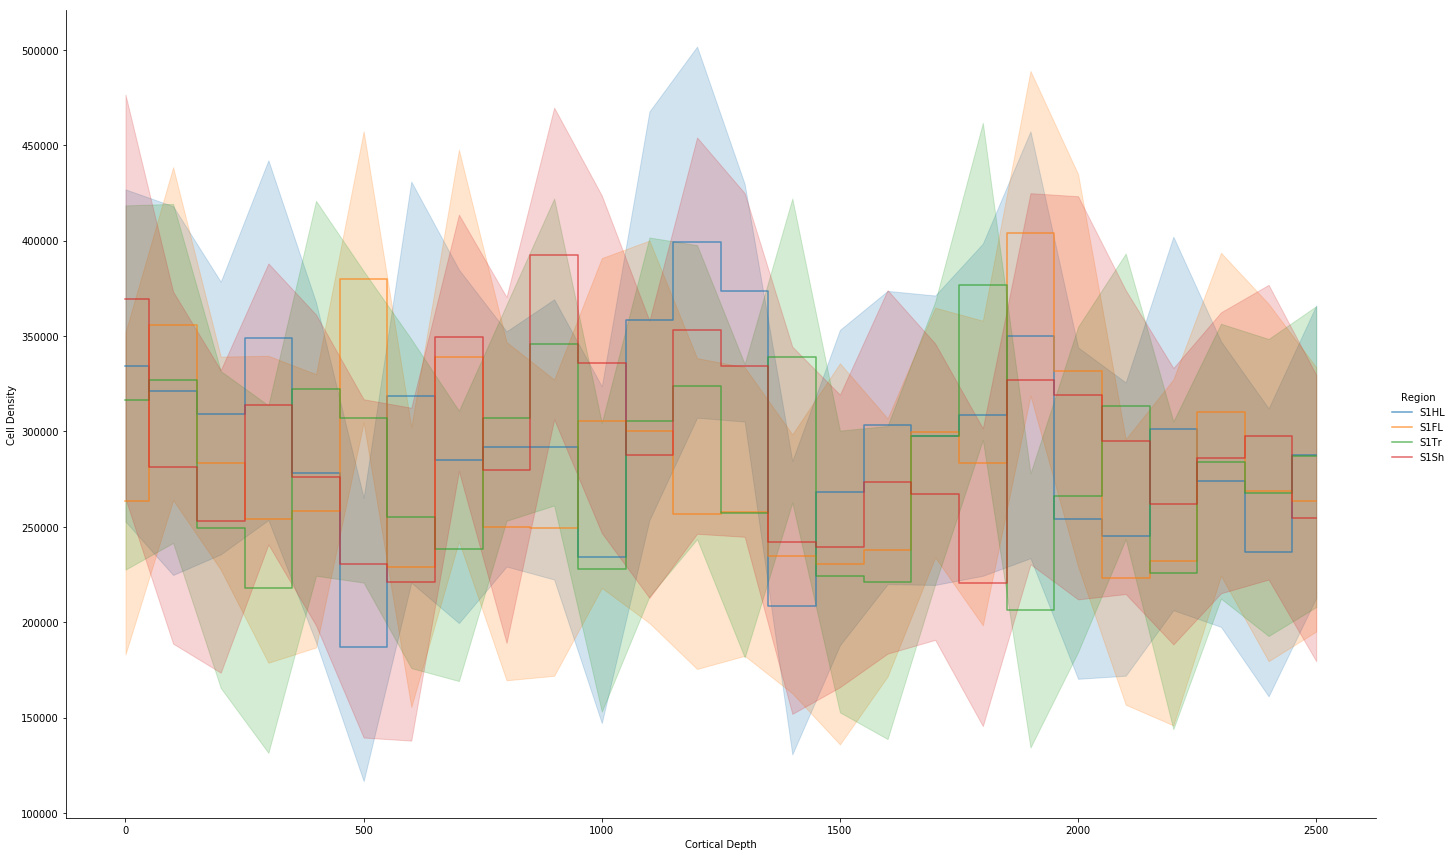

In [10]:
cell_density_report =\
    suite_composition_analyses\
        .analysis_cell_density_by_depth_using_sampling(
            mock_circuit_model,
            adapter)

In [ ]:
suite_composition_analyses\
    .measurement_cell_density_using_sampling(
        mock_circuit_model,
        adapter,
        **parameters[100])

In [ ]:
d = pd.DataFrame({"xs": range(10), "ys": range(11, 21)})
d.reindex([11, 12]).dropna().shape[0]

In [ ]:
from neuro_dmt.models.bluebrain.circuit.geometry import Cuboid
mock_circuit_model\
    ._get_bluepy_cell_query(
        **mock_circuit_model._resolve_query_region(
            depth=100,
            layer="L2",
            roi=Cuboid(np.zeros(3), np.ones(3))))

In [ ]:
mock_circuit_model\
    .get_cells(depth=100)\
    .head()

In [ ]:
composition_analyses\
    .analysis_mtype_cell_density_by_layer_exhaustively(
        circuit_bio_m,
        adapter)

In [ ]:
composition_analyses.measurement_mtype_cell_density_exhaustively(
    circuit_bio_m,
    adapter,
    layer="L1",
    region="S1HL")

In [ ]:
cell_counts =\
    cells.groupby(
        ["region", "layer", "mtype"]
    ).agg(
        "size"
    )
cell_counts.xs(
    ("S1HL", 1),
    level=("region", "layer"))

In [ ]:
cell_counts.xs(
    ("S1FL", 2), level=("region", "layer")
)/cell_counts.xs(
    ("S1HL", 2), level=("region", "layer")
)

In [ ]:
cell_counts.xs(
    ("S1HL", 2), level=("region", "layer"))

In [ ]:
from neuro_dmt.analysis.reporting import CheetahReporter
from neuro_dmt import terminology

cd_rd =\
    composition_analysis.reference_data_cell_density(
                                adapter.get_brain_regions(circuit_bio_m))
cd_measurement =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_measurement(
            circuit_bio_m,
            adapter,
            reference_data=cd_rd,
            sampling_methodology=terminology.sampling_methodology.random,
            sample_size=2)
            
cd_report =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_report(
            cd_measurement,
            reference_data=cd_rd,
            figures={},
            **adapter.get_provenance(circuit_bio_m))


In [ ]:
from neuro_dmt import terminology
inh_fraction_report =\
    composition_analysis\
        .analysis_inihibitory_cell_fraction_by_layer_overall(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
inh_fraction_report.measurement

In [ ]:
print(rat.defelipe2017.data.shape)
rat.defelipe2017.data.groupby("layer").agg(["size", "mean", "std"])

In [ ]:
defelipe_2017 =\
    data_plotting[
        data_plotting.dataset == "DeFelipe2017"]
print(defelipe_2017.shape[0])
defelipe_2017\
    .groupby("layer")\
    .agg(["mean", "std"])

In [ ]:
seaborn.barplot(
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
).set(
    xlabel="Layer",
    ylabel="Cell Density")

In [ ]:
seaborn.catplot(
    kind="bar",
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
)

In [ ]:
import seaborn
data =\
    cd_report.measurement\
        .groupby(["layer", "region"])\
        .agg(["mean", "std"])\
        .reset_index()
data.head()
seaborn.barplot(
    x="layer",
    y=("cell_density", "mean"),
    hue="region",
    data=data)

In [ ]:
overall_cd_m =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
overall_cd_m

In [ ]:
from neuro_dmt import terminology
overall_cd =\
    cell_density_analysis(
        circuit_bio_m,
        adapter,
        sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *
bars = Bars(
    xvar="layer",
    xlabel="Layer",
    yvar="cell_density",
    ylabel="Cell Density",
    gvar="dataset")

In [ ]:
cell_density_measurement =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter)

In [ ]:
cell_density_analysis.get_figures(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
cdard =\
    cell_density_analysis\
        ._with_reference_data(
            cell_density_measurement["data"])

In [ ]:
cdard["DeFelipe2014"]

In [ ]:
from dmt.data.observation import measurement
measurement.concat_as_samples(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *

cell_density_analysis =\
    BrainCircuitAnalysis(
        phenomenon=composition_analysis.phenomenon_cell_density,
        AdapterInterface=composition_analysis.AdapterInterface,
        reference_data=composition_analysis.sampled_reference_data(
            composition_analysis.reference_data_cell_density),
        measurement_parameters=composition_analysis.parameters_regions_and_layers,
        sample_measurement=composition_analysis.sample_measurement_cell_density,
        plotter=MultiPlot(
            mvar="region",
            plotter=Bars(
                xvar="layer",
                xlabel="Layer",
                yvar="cell_density",
                ylabel="Cell Density",
                gvar="dataset")),
        report=CircuitAnalysisReport)

In [ ]:
cell_density_analysis(circuit_bio_m, adapter)

In [ ]:
parameter_values =\
    cell_density_analysis\
        .measurement_parameters


In [ ]:
parameter_values

In [ ]:
class Test:
    def __init__(self,value):
        if not isinstance(value, Test):
            self.value = value
        else:
            self.value = value.value
            

In [ ]:
test = Test(10)
test_2 = Test(test)

In [ ]:
test_2 == test

In [ ]:
import pandas as pd
from dmt.tk.parameters import Parameters

regions = ["S1HL", "S1FL"]
layers = range(1,7)
regions_and_layers =\
    pd.DataFrame({
        "region": [r for r in regions for _ in layers],
        "layer": [l for _ in regions for l in layers]})
p0 = Parameters(regions_and_layers)
p1 = Parameters(p0)

In [ ]:
p1.values

In [ ]:
(43345060) ** (1./3.)

In [ ]:
regions_and_layers =\
    composition_analysis\
        .parameters_regions_and_layers

In [ ]:
regions_and_layers._resolve_values(adapter, circuit_bio_m)